# Softmax

Softmax is used for multiclass classification. The output from this function is probability of belonging to the given class.

This notebook also uses multivariate data (2 dimensions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Lets generate some artificial data

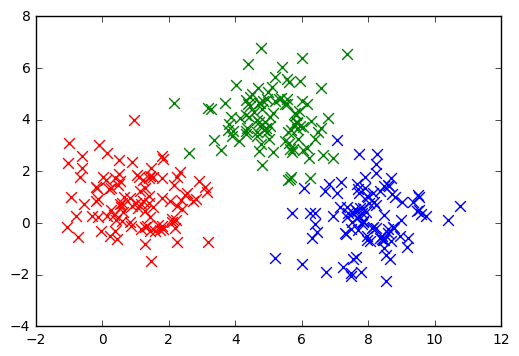

In [21]:
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='x', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='x', s=60)
plt.show()

## And build traning set from it
The label needs 3 columns (one for each class).

In [39]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

xs = np.vstack((xs_label0, xs_label1, xs_label2))

labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

train_size, num_features = xs.shape

## Build test set

This time we will use separate test set for model evaluation

In [38]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))

test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

## Prepare TF model with softmax regression

In [43]:
learning_rate = 0.01
training_epoch = 1000
num_labels = 3
batch_size = 100

X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.float32, shape=[None, num_labels])

# Model 
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
model_op = tf.nn.softmax(tf.matmul(X, W) + b)
loss_op = -tf.reduce_sum(Y*tf.log(model_op))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)

# Metrics
correct_prediction = tf.equal(tf.argmax(model_op, 1), tf.argmax(Y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

Train estimator.

In this tutorial estimator is train using Stochastic Gradient Descent method.

In [48]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(training_epoch * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset+batch_size), :]
        batch_labels = labels[offset:(offset+batch_size), :]      
        err, _ = sess.run([loss_op, train_op], {X:batch_xs, Y:batch_labels})
        if step % 100 == 0:
            print('step:%d, errors: %f' % (step, err))
    w_vals, b_val = sess.run([W, b])
    print('Accuracy:', sess.run(accuracy, {X:test_xs, Y:test_labels}))

step:0, errors: 109.861198
step:100, errors: 6.243576
step:200, errors: 7.319198
step:300, errors: 6.376147
step:400, errors: 4.063791
step:500, errors: 5.585019
step:600, errors: 5.662230
step:700, errors: 3.496017
step:800, errors: 4.836982
step:900, errors: 5.312312
step:1000, errors: 3.195235
step:1100, errors: 4.366714
step:1200, errors: 5.079407
step:1300, errors: 2.994599
step:1400, errors: 4.030498
step:1500, errors: 4.903234
step:1600, errors: 2.845166
step:1700, errors: 3.773817
step:1800, errors: 4.760140
step:1900, errors: 2.726531
step:2000, errors: 3.569653
step:2100, errors: 4.638841
step:2200, errors: 2.628384
step:2300, errors: 3.402537
step:2400, errors: 4.533287
step:2500, errors: 2.544865
step:2600, errors: 3.262787
step:2700, errors: 4.439923
step:2800, errors: 2.472363
step:2900, errors: 3.143946
Accuracy: 0.966667
